# imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import csv
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [2]:
conc = [0, 2, 4, 6]

([<matplotlib.axis.XTick at 0x7f8b391d5d00>,
 [Text(1, 0, '040'), Text(3, 0, '046'), Text(5, 0, '080'), Text(7, 0, '086')])

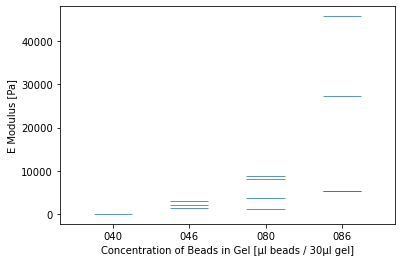

In [3]:
# 12.10
# soft and hart cantilever used. 
# did exp on 12 then 13 
posis = [1, 3, 5, 7]
rc040 = [128]
rc046 = [1500, 2200, 3e3]


rc08 = [3683, 1184, 8126, 8869]
# [2mu5(hart)pos2, run(2hart), run3(hart), 2mu5s]

rc08_B = [45640, 5316, 27250, 5433]
#[2mu5s(hart), run2(hart), run3(hart), tag3(hart)]

plt.eventplot([rc040, rc046, rc08, rc08_B], orientation="vertical", lineoffsets=posis, linewidth=0.75)
plt.ylabel("E Modulus [Pa]")
plt.xlabel("Concentration of Beads in Gel [µl beads / 30µl gel]")
plt.xticks(posis, labels=["040", "046", "080", "086"])

In [4]:
# 2.11 results bad because inverted pattern on alveole used

In [5]:
# 9.11 results also bad because on 8.11 also wrong pattern used

In [6]:
# learned 11.11 that pattern was inverted got some 20kPa on hantel

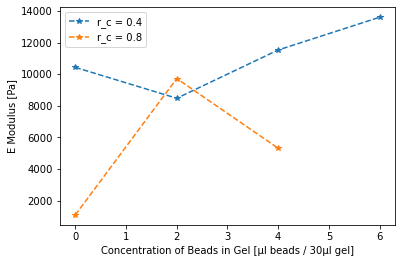

In [7]:
# 17.11
# Alveole 5mJ
# sadly here i just realised that position between dumbbells 
#is much better than under them but did not consequently do that
rc04 = [10430, 8476, 11530, 13600]
rc08 = [1.1e3, 9724, 5316, 0]

plt.plot(conc, rc04, "--*", label="r_c = 0.4")
plt.plot(conc[:3], rc08[:3], "--*", label="r_c = 0.8")
plt.ylabel("E Modulus [Pa]")
plt.xlabel("Concentration of Beads in Gel [µl beads / 30µl gel]")
plt.legend()

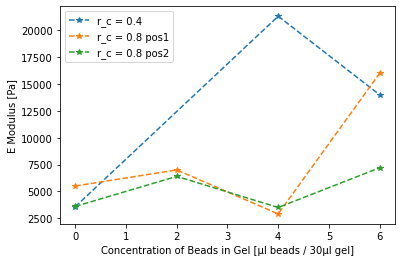

In [8]:
# 19.11
# most positions between dumbbells
# found that tilt correction does not change much about the fit
# these values are the tilt corrected but only 10% difference i reckon
rc04 = [3570, 0, 21320, 14e3]
rc08pos1 = [5.5e3, 7e3,  2.9e3, 16e3]
rc08pos2 = [3.6e3, 6.4e3, 3.5e3, 7.2e3]

plt.plot(np.array(conc)[[0,2,3]], np.array(rc04)[[0,2,3]], "--*", label="r_c = 0.4")
plt.plot(conc, rc08pos1, "--*", label="r_c = 0.8 pos1")
plt.plot(conc, rc08pos2, "--*", label="r_c = 0.8 pos2")
plt.ylabel("E Modulus [Pa]")
plt.xlabel("Concentration of Beads in Gel [µl beads / 30µl gel]")
plt.legend()
plt.savefig("20211119_E")

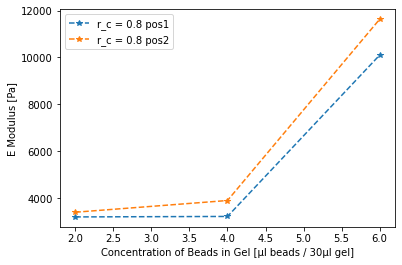

In [9]:
# 23.11
# All positions between dumbbells
# geld produced on that gel were shit 2mJ so used 19.11 gels
rc08p1 = [11.11e3, 3.2e3, 3.22e3, 10.1e3]
rc08p2 = [10.36e3, 3.4e3, 3.9e3, 11.63e3]
#rc086 has two cool different positions but similar E values:)
plt.plot(conc[1:], rc08p1[1:], "--*", label="r_c = 0.8 pos1")
plt.plot(conc[1:], rc08p2[1:], "--*", label="r_c = 0.8 pos2")
plt.ylabel("E Modulus [Pa]")
plt.xlabel("Concentration of Beads in Gel [µl beads / 30µl gel]")
plt.legend()
plt.savefig("20211123_E")

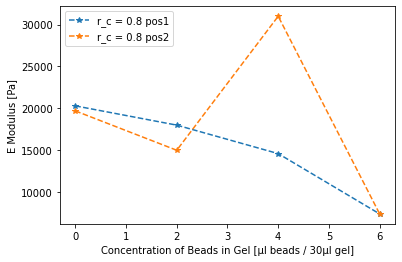

In [10]:
# 07.12
# all position bewtween dumbbells
# +086 not nice structures
# in general gradient still bc old primo

rc08p1 = [20.3e3, 18e3, 14.6e3, 7.4e3]
rc08p2 = [19.7e3, 15e3, 31e3, 7.4e3]

plt.plot(conc, rc08p1, "--*", label="r_c = 0.8 pos1")
plt.plot(conc, rc08p2, "--*", label="r_c = 0.8 pos2")
plt.ylabel("E Modulus [Pa]")
plt.xlabel("Concentration of Beads in Gel [µl beads / 30µl gel]")
plt.legend()


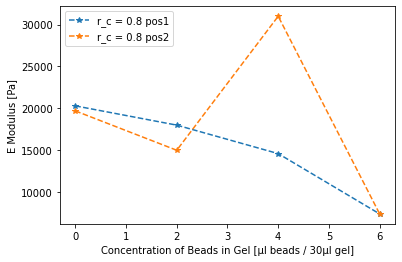

In [11]:
# 08.12
# all position bewtween dumbbells
#046 crystallised shit thing
# in general gradient still bc old primo

rc082 = [26e3, 27e3, 20e3] # all on 082
rc042p1 = [17.4e3, 0, 1, 0]
rc042p2 = [17.7e3, 0, 1, 0] # not fitted yet


plt.plot(conc, rc08p1, "--*", label="r_c = 0.8 pos1")
plt.plot(conc, rc08p2, "--*", label="r_c = 0.8 pos2")
plt.ylabel("E Modulus [Pa]")
plt.xlabel("Concentration of Beads in Gel [µl beads / 30µl gel]")
plt.legend()

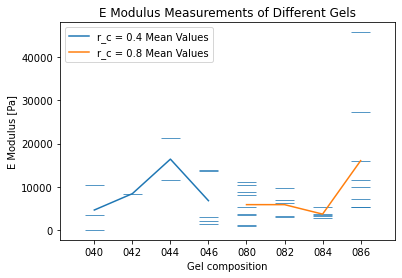

In [12]:
# 30.11
# took all previous data together.
r04 = [[128, 10430, 3570],[8476 ],[11530, 21320],[1500, 2200, 3e3, 13600, 14e3]]
r08 = [[3683, 1184, 8126, 8869, 1.1e3, 5.5e3, 3.6e3, 11.11e3, 10.36e3],
       [9724, 7e3, 6.4e3, 3.2e3, 3.4e3],
       [5316, 2.9e3, 3.5e3, 3.22e3, 3.9e3],
       [45640, 5316, 27250, 5433, 16e3, 7.2e3, 10.1e3, 11.63e3]]

posis = [1, 3, 5, 7, 9, 11, 13, 15]
r04_means = [np.mean(x) for x in r04]
r08_means = [np.mean(x) for x in r08]
r04.extend(r08)
plt.eventplot(r04, orientation="vertical", lineoffsets=posis, linewidth=0.75)
plt.plot(posis[:4], r04_means, label="r_c = 0.4 Mean Values")
plt.plot(posis[4:8], r08_means, label="r_c = 0.8 Mean Values")
plt.ylabel("E Modulus [Pa]")
plt.xlabel("Gel composition")
plt.title("E Modulus Measurements of Different Gels")
plt.xticks(posis, labels=["040", "042", "044", "046", "080", "082", "084", "086"])
plt.legend(loc="upper left")
plt.savefig("20211130_E_Summary")
plt.show()

In [13]:
np.mean(r04[1])

8476.0

In [14]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [15]:
# matrix rotation


In [16]:
a = np.array([[0,1],[1,0]])
c = np.cos(np.pi/4)
s = np.sin(np.pi/4)
rot = np.array([[c, -s],[s, c]])
a

array([[0, 1],
       [1, 0]])

In [17]:
np.dot(rot, a)

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [18]:
rot*a

array([[ 0.        , -0.70710678],
       [ 0.70710678,  0.        ]])

In [19]:
3+1

4

# 2022.01.14

In [20]:
# softdummbells around 3kPa

In [21]:
E_20220114_HM = [2318.04, 2321.21, 2277.30, 2313.60, 2296.28, 2327.49, 2302.53, 2314.26, 2187.38, 2156.90, 2054.76, 2205.08, 2243.32, 2192.04, 2058.39, 2261.05, 2267.57, 2246.21, 2240.86, 2120.64, 2242.65, 2163.84, 2119.37, 2195.78, 2225.84, 2184.14, 2273.14, 2258.84, 2021.44, 1817.34, 2340.97, 2318.55, 2308.88, 2296.87, 2161.37, 2193.08, 2220.67, 2304.06, 2180.38, 2118.01, 2214.93, 2301.37, 2324.13, 2246.78, 2230.63, 2131.05, 2078.34, 2213.71, 2152.88, 2277.58, 2253.16, 2346.76, 2318.32, 2323.00, 2296.33, 2209.41, 2166.33, 2262.05, 2264.27, 2259.35, 2248.62, 2147.31, 2014.65, 1849.47, 2313.29, 2219.96, 1622.28, 2029.84, 1946.24, 2335.49, 2365.76, 2365.30, 2334.33, 2358.49, 2363.20, 2345.82, 2330.28, 2335.76, 2247.66, 2215.42, 2207.46, 2224.78, 2253.86, 2245.35, 2035.82, 1875.16, 2059.16, 2202.92, 2205.53, 2246.82, 2272.04, 2272.98, 2300.26, 2302.45, 2256.99, 2252.82, 2214.24, 2229.02, 2258.38, 2260.69, 2256.05, 2237.73, 2206.81, 2231.61, 2362.31, 2345.25, 2338.01, 2330.02, 2318.20, 2304.38, 2298.59, 2251.74, 2254.88, 2308.17, 2322.45, 2341.24, 2344.15, 2308.24, 2364.92, 2379.14, 2288.32, 2372.17, 2360.63, 2353.79, 2332.82, 2331.98, 2281.23, 2269.26, 2664.00, 2671.55, 2636.07, 2649.74, 2638.15, 2670.07, 2644.30, 2636.11, 2644.53, 2655.33, 2663.29, 2632.05, 2639.35, 2679.16, 2678.88, 2671.71, 2641.21, 2680.63, 2673.29, 2623.09, 2613.82, 2615.97, 2606.41, 2574.68, 2570.92, 2536.75, 2533.45, 2500.65, 2378.80, 2302.75, 2662.63, 2474.51, 2483.65, 2520.32, 2529.57, 2508.93, 2441.35, 2358.79, 2632.36, 2645.18, 2617.24, 2636.76, 2587.21, 2605.64, 2636.35, 2646.92, 2647.18, 2677.72, 2668.07, 2662.37, 2625.40, 2599.91, 2590.42, 2567.53, 2574.87, 2601.78, 2627.91, 2613.30, 2603.64, 2605.40, 2584.62, 2642.17, 2661.12, 2678.52, 2613.70, 2605.21, 2590.66, 2592.15, 2580.36, 2595.29, 2532.79, 2503.78, 2482.84, 2483.11, 2538.46, 2546.40, 2556.86, 2570.94, 2570.46, 2574.49, 2413.33, 2399.24, 2348.07, 2279.44, 2463.63, 2463.90, 2442.60, 2430.65, 2405.98, 2204.14, 2400.75, 2420.57, 2418.82, 2429.69, 2361.43, 2454.69, 2428.17, 2429.62, 2387.36, 2379.79, 2378.43, 2354.71, 2348.86, 2362.85, 2330.07, 2325.57, 2092.47, 2020.21, 2338.54, 2386.39, 2394.23, 2415.72, 2372.85, 2363.89, 2351.63, 2333.57, 2316.63, 2301.09, 2306.00, 2298.55, 2272.84, 2234.16, 2258.15, 2273.29, 2307.41, 2332.11, 2353.20, 2357.61]
E_20220114_TSS = [2889.77, 2892.21, 2831.61, 2883.39, 2858.85, 2904.43, 2866.96, 2882.83, 2703.79, 2663.20, 2522.88, 2726.08, 2782.27, 2710.71, 2527.79, 2807.27, 2816.44, 2788.81, 2780.84, 2613.51, 2784.55, 2671.96, 2609.32, 2716.61, 2762.41, 2703.38, 2825.35, 2807.42, 2475.78, 2201.14, 2925.52, 2890.00, 2875.56, 2861.81, 2667.72, 2707.67, 2754.79, 2858.21, 2694.17, 2607.32, 2741.16, 2867.39, 2900.60, 2789.39, 2767.92, 2628.65, 2555.60, 2741.09, 2658.81, 2835.65, 2799.48, 2934.40, 2891.42, 2897.13, 2860.16, 2735.71, 2676.22, 2812.04, 2814.85, 2808.37, 2793.60, 2653.25, 2464.10, 2245.36, 2877.64, 2755.83, 1949.63, 2483.69, 2374.72, 2915.95, 2960.45, 2961.93, 2918.64, 2948.96, 2954.73, 2929.18, 2906.67, 2914.77, 2789.45, 2745.04, 2735.66, 2757.94, 2799.93, 2788.52, 2497.49, 2280.70, 2524.48, 2725.18, 2734.75, 2788.35, 2821.63, 2821.31, 2863.04, 2866.88, 2801.63, 2798.19, 2742.62, 2763.96, 2806.01, 2808.97, 2803.21, 2777.26, 2732.65, 2768.71, 2957.68, 2929.37, 2917.86, 2904.89, 2886.85, 2869.09, 2860.92, 2793.51, 2800.00, 2876.85, 2897.59, 2925.22, 2929.11, 2877.68, 2955.18, 2980.87, 2830.36, 2969.96, 2950.72, 2939.34, 2908.91, 2908.16, 2835.00, 2820.34, 3412.77, 3444.20, 3383.29, 3406.32, 3388.98, 3441.22, 3401.11, 3389.60, 3393.86, 3411.95, 3422.94, 3373.82, 3385.54, 3444.27, 3445.28, 3433.90, 3385.77, 3442.76, 3430.43, 3353.88, 3342.15, 3348.08, 3335.88, 3285.42, 3278.21, 3229.37, 3224.54, 3173.91, 3000.66, 2886.31, 3417.76, 3138.09, 3144.76, 3195.75, 3210.79, 3180.18, 3080.94, 2963.03, 3376.25, 3395.57, 3350.90, 3381.56, 3306.16, 3332.80, 3379.80, 3395.73, 3395.68, 3442.23, 3425.37, 3413.90, 3355.73, 3316.66, 3305.18, 3273.18, 3287.21, 3329.51, 3368.13, 3347.35, 3330.15, 3332.27, 3298.98, 3387.63, 3417.93, 3442.91, 3337.46, 3340.27, 3308.88, 3308.89, 3290.77, 3313.47, 3217.52, 3173.59, 3144.30, 3139.04, 3222.67, 3236.22, 3251.97, 3271.46, 3272.69, 3279.15, 3037.91, 3016.92, 2940.71, 2843.34, 3111.03, 3111.97, 3079.74, 3060.54, 3025.73, 2728.30, 3012.91, 3042.62, 3041.67, 3057.48, 2956.75, 3096.33, 3055.75, 3058.38, 2994.70, 2984.74, 2982.57, 2948.15, 2938.37, 2958.57, 2910.39, 2900.87, 2567.26, 2467.20, 2920.86, 2993.15, 3004.39, 3036.66, 2973.35, 2959.75, 2941.00, 2915.24, 2889.50, 2865.99, 2873.44, 2862.63, 2824.43, 2747.56, 2798.33, 2821.21, 2872.72, 2910.11, 2943.18, 2949.64]

# 2022.01.21

In [22]:
E_20220121_HM = [1811.44, 1804.87, 1808.76, 1810.59, 1759.97, 1777.55, 1700.89, 1762.70, 1788.65, 1812.57, 1840.60, 1820.27, 1759.96, 1887.82, 1867.96, 1887.45, 1802.49, 1885.67, 1885.63, 1893.35, 1889.73, 1882.98, 1868.32, 1956.52, 1877.68, 1900.47, 1910.90, 1933.03, 1943.03, 1952.31, 1978.73, 1952.01, 1951.44, 1966.87, 1856.96, 1930.88, 1915.66, 1898.77, 1884.39, 1843.06, 1866.22, 1899.69, 1934.78, 1947.31, 1987.43, 2007.14, 1993.61, 2004.15, 1999.71, 2001.17, 2000.24, 1976.85, 1978.25, 1958.00, 1941.04, 1887.39, 1944.06, 1955.09, 1980.79, 2027.75, 2059.78, 2066.45, 2063.97, 3082.26, 2927.06, 2930.77, 2947.84, 2975.75, 3048.90, 3069.14, 3103.54, 3200.54, 3178.62, 3098.16, 3042.90, 2928.91, 2764.23, 2601.80, 2434.65, 2373.49, 2378.97, 2423.42, 2470.36, 2535.60, 2616.45, 2722.18, 2807.19, 2950.03, 2943.83, 2878.58, 2839.17, 2790.14, 2694.88, 2596.69, 2547.23, 2515.59, 2477.85, 2495.20, 2483.84, 2494.20, 2522.27, 2551.60, 2634.21, 2782.64, 2834.16, 2688.82, 2751.27, 2726.04, 2680.63, 2635.30, 2591.16, 2630.53, 2545.43, 2526.39, 2548.89, 2589.09, 2647.53, 2739.33, 2709.14, 2832.52, 2922.17, 2926.10, 2907.15, 2877.48, 2837.01, 2780.47, 2771.49]

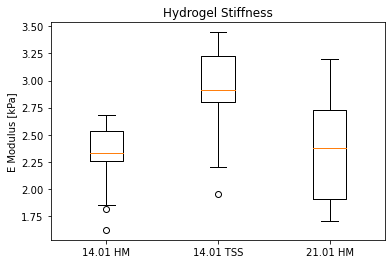

In [23]:
fig, ax = plt.subplots()

ax.boxplot([np.array(E_20220114_HM)*1e-3, np.array(E_20220114_TSS)*1e-3, np.array(E_20220121_HM)*1e-3])
ax.set_ylabel("E Modulus [kPa]")
#ax.set_yticks((np.arange(0, np.max(E_20220114_TSS), 500))*1e-3)
ax.set_title("Hydrogel Stiffness")
ax.set_xticklabels(["14.01 HM","14.01 TSS","21.01 HM"])
#fig.savefig("softgels.png", dpi=300)
plt.show()

# 2022.02.23

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b30e86e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b30e11520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b30e86ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b30e11be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b30e11f40>],
 'means': []}

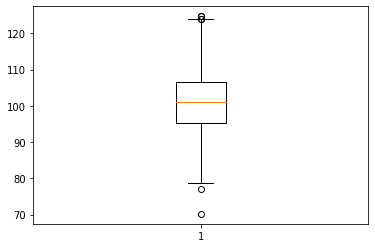

In [24]:
np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
plt.boxplot(collectn_1)

In [25]:
E_20220223_D1_p1 = [27172.9,  26820.8,  27308.0,  27474.7,  26753.3,  28255.5,  28257.6, 26804.0, 26220.3, 27649.1, 26838.8, 25727.5, 26832.6, 26638.2, 25651.4, 26573.1, 23978.6, 25726.6, 26069.6, 25967.0, 23854.2, 24711.0, 27392.9, 26953.9, 25822.6, 25456.4, 24361.4, 24327.0, 25329.8, 25390.0, 25368.7, 23265.7, 21881.4, 21831.6, 23583.0, 25129.3, 23509.8, 22606.6, 23620.0, 22222.1, 19362.2, 19946.8, 20177.1, 20811.6, 22123.7, 23615.3, 24429.4, 23187.3, 18901.3, 19502.9, 19566.1,  19286.6, 19871.8, 18987.5, 18322.3, 19110.3, 18397.1, 18381.8,  17186.1,  18541.7,  17692.9,  19086.1,  19150.2,  18507.7]
E_20220223_D1_p2 = [31321.8, 32585.0, 33210.1, 35007.0, 36994.0, 38234.6, 34591.6, 35982.3, 33995.8, 33487.3, 34382.5, 34518.4, 34954.3, 34349.5, 33715.3, 30961.0, 31707.1, 33140.2, 33360.2, 34300.3, 36445.7, 39233.9, 40841.4, 40421.8, 39056.4, 37513.7, 35404.3, 32921.0, 32531.2, 31403.1, 28864.5, 28624.5, 30690.9, 32902.7, 32759.1, 34102.0, 37037.3, 38508.3, 39261.9, 38972.1, 37954.4, 36663.8, 34720.6, 34392.5, 33075.5, 31849.1, 28657.8, 26371.1, 27467.9, 26851.0, 27895.7, 27658.9, 28678.2, 31591.6, 31264.4, 31748.0, 32705.0, 31467.7, 31829.3, 31311.8, 29562.4, 3815.75, 5034.18]
E_20220223_D2_p1 = [28844.3, 38119.9, 37161.9, 38534.3, 36404.8, 44056.4, 51658.5, 34564.9, 32677.7, 35749.2, 38739.3, 43435.9, 46032.0, 40686.3, 41654.3, 36662.1, 34468.5, 36318.2, 34824.3, 34673.8, 33362.0, 27133.0, 25952.1, 23167.3, 26221.5, 31812.6, 33412.2, 30476.1, 35327.6, 34683.2, 38467.4, 43590.2, 29754.2, 34177.9, 33974.3, 36483.3, 28129.4, 27700.6, 25580.2, 24632.8, 26410.8, 33097.1, 36052.3, 33336.2, 41685.9, 36766.3, 40899.6, 41623.0, 34243.5, 39094.5, 35620.3, 32392.6, 30896.8, 28358.3, 22088.5, 22097.6, 26583.2, 31648.7, 30039.7, 32541.3, 35538.6, 40066.8]
E_20220223_D2_p2 = [26746.4, 16013.4, 15546.7, 16972.3, 14327.3, 11583.1, 11297.2, 11618.4, 10653.0, 11978.8, 11568.7, 11113.6, 14742.3, 17668.6, 19479.8, 21069.6, 24922.9, 23665.5, 17639.3, 13693.3, 11508.5, 11577.1, 11456.5, 11268.6, 14942.4, 12563.5, 11079.8, 12006.6, 13522.5, 19285.9, 26523.2, 30075.6, 33493.9, 28994.4, 21644.5, 15495.0, 13106.8, 12954.5, 17202.3, 21777.2, 30125.5, 24107.8, 18179.9, 18080.3, 18728.2, 22814.9, 30135.4, 33348.4, 35147.7, 33176.3, 28462.3, 23706.7, 23965.8, 26453.0, 32204.0, 32026.7, 33675.2, 34574.2, 28563.4, 27290.4, 26494.9, 31983.3, 35546.2, 35688.0]
E_20220223_All = np.array(E_20220223_D1_p1+E_20220223_D1_p2+E_20220223_D2_p1+E_20220223_D2_p2).reshape(-1,)

(array([ 2., 16., 15., 33., 60., 39., 62., 21.,  4.,  1.]),
 array([ 3815.75 ,  8600.025, 13384.3  , 18168.575, 22952.85 , 27737.125,
        32521.4  , 37305.675, 42089.95 , 46874.225, 51658.5  ]),
 <BarContainer object of 10 artists>)

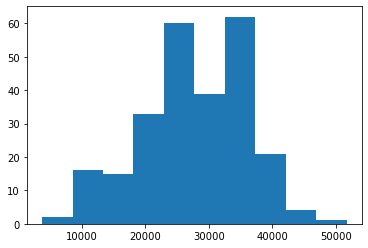

In [26]:
plt.hist(E_20220223_All)

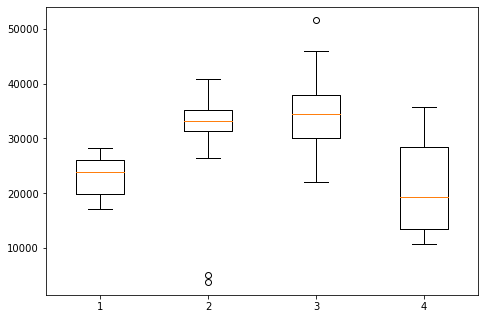

In [27]:
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot

ax.boxplot([E_20220223_D1_p1, E_20220223_D1_p2, E_20220223_D2_p1, E_20220223_D2_p2])
plt.show()
#plt.boxplot(E_20220223_D1_p1, E_20220223_D1_p2)

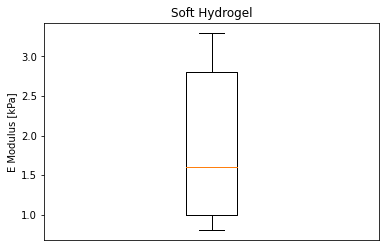

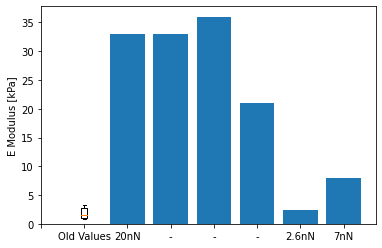

In [28]:
all_old = np.array([2.8, 2.8, 3.3, 3.0, 0.85, 1, 0.8, 1, 1.6]) #17.01 x4, 14.02 x2, 15.02 x2
plt.boxplot(all_old)
plt.ylabel("E Modulus [kPa]")
plt.title("Soft Hydrogel")
plt.xticks([0],[""])
plt.savefig("OldSoftGels.png", dpi=300)
plt.show()
all_old = np.array([2.8, 2.8, 3.3, 3.0, 0.85, 1, 0.8, 1, 1.6]) #17.01 x4, 14.02 x2, 15.02 x2
plt.boxplot(all_old)
plt.ylabel("E Modulus [kPa]")
softgels_23_02 = [33, 33, 36, 21, 2.4, 8]
plt.bar([2,3,4,5,6,7], softgels_23_02)
plt.xticks([r  for r in range(8)],
        ["","Old Values","20nN","-","-","-","2.6nN","7nN"])
plt.savefig("Softgels_newtoo.png", dpi=300)

In [29]:
r08 = [8126, 8869, 11.11e3, 10.36e3,
       9724, 27250, 16e3, 7.2e3, 10.1e3, 11.63e3]
r08 = np.array(r08).reshape(-1,)

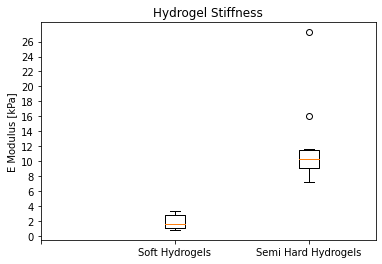

In [30]:
fig, ax = plt.subplots()

ax.boxplot([all_old, r08*1e-3])
plt.ylabel("E Modulus [kPa]")
ax.set_yticks((np.arange(0, r08.max(), 2000))*1e-3)
ax.set_title("Hydrogel Stiffness")
plt.xticks( [0,1,2],["","Soft Hydrogels","Semi Hard Hydrogels"])
fig.savefig("SoftAndSemiHardGels.png", dpi=300)
plt.show()

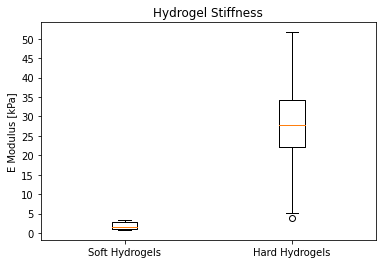

In [31]:
fig, ax = plt.subplots()

ax.boxplot([all_old, E_20220223_All*1e-3])
ax.set_ylabel("E Modulus [kPa]")
ax.set_yticks((np.arange(0, E_20220223_All.max()*1e-3, 5)))
ax.set_title("Hydrogel Stiffness")
ax.set_xticklabels(["Soft Hydrogels","Hard Hydrogels"])
fig.savefig("SoftAndHardGels.png", dpi=300)
plt.show()

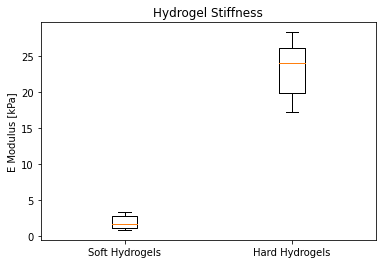

In [32]:
fig, ax = plt.subplots()

ax.boxplot([all_old, np.array(E_20220223_D1_p1)*1e-3])
plt.ylabel("E Modulus [kPa]")
#ax.set_yticks((np.arange(0, np.array(E_20220223_D1_p1).max()*1e-3, 2.5)))
ax.set_title("Hydrogel Stiffness")
ax.set_xticklabels(["Soft Hydrogels","Hard Hydrogels"])
ax.set_xticklabels
fig.savefig("SoftAndGoodLookingHardGels.png", dpi=300)
plt.show()

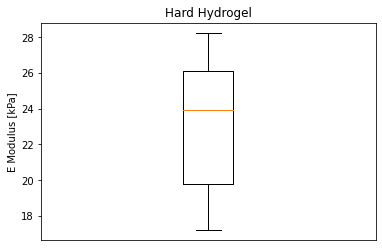

In [33]:
plt.boxplot(np.array(E_20220223_D1_p1)*1e-3)
plt.ylabel("E Modulus [kPa]")
plt.title("Hard Hydrogel")
plt.xticks([0],[""])
plt.savefig("GoodLookingHardGels.png", dpi=300)
plt.show()

# Cell Measurement

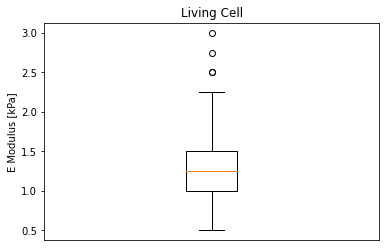

In [34]:
E_cell_20220114 = [0.5]+ [0.75 for i in range(16)] + [1 for i in range(34)] + [1.25 for i in range(44)] + [1.5 for i in range(22)] + [1.75 for i in range(12)] + [2 for i in range(5)]+ [2.25, 2.5, 2.5, 2.75, 3]

plt.boxplot(np.array(E_cell_20220114))
plt.ylabel("E Modulus [kPa]")
plt.title("Living Cell")
plt.xticks([0],[""])
plt.savefig("LivingCellE.png", dpi=300)
plt.show()

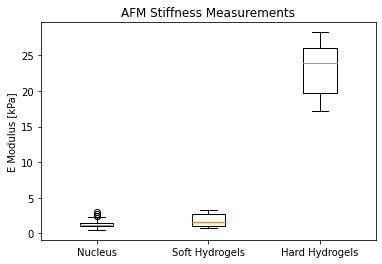

In [35]:
fig, ax = plt.subplots()

ax.boxplot([np.array(E_cell_20220114), all_old, np.array(E_20220223_D1_p1)*1e-3])
plt.ylabel("E Modulus [kPa]")
#ax.set_yticks((np.arange(0, np.array(E_20220223_D1_p1).max()*1e-3, 2.5)))
ax.set_title("AFM Stiffness Measurements")
ax.set_xticklabels(["Nucleus","Soft Hydrogels","Hard Hydrogels"])
fig.savefig("SoftAndGoodLookingHardGelsAndCells.png", dpi=300)
plt.show()

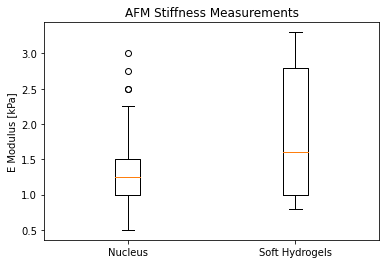

In [36]:
fig, ax = plt.subplots()

ax.boxplot([np.array(E_cell_20220114), all_old])
plt.ylabel("E Modulus [kPa]")
#ax.set_yticks((np.arange(0, np.array(E_20220223_D1_p1).max()*1e-3, 2.5)))
ax.set_title("AFM Stiffness Measurements")
ax.set_xticklabels(["Nucleus","Soft Hydrogels"])
fig.savefig("SoftGelsAndCells.png", dpi=300)
plt.show()

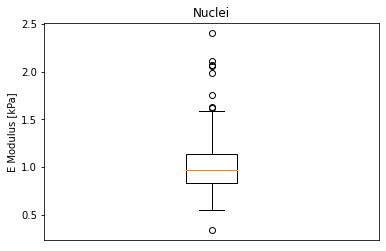

In [37]:
# with height Measured
E_cell_20220124_HM = [736.195, 820.806, 850.901, 850.151, 972.994, 882.011, 914.164, 864.005, 921.837, 972.664, 1003.12, 934.922, 819.648, 883.086, 898.620, 995.767, 981.726, 906.736, 904.879, 957.099, 1003.99, 1059.68, 1089.60, 1100.92, 978.405, 965.805, 981.843, 943.626, 927.190, 1053.67, 1199.55, 1239.86, 1124.05, 1136.33, 995.216, 927.861, 1042.45, 1000.51, 1137.32, 1194.25, 1092.33, 1136.20, 1183.18, 1293.28, 1207.08, 1475.58, 1627.76, 2056.08, 1982.21, 1621.54, 1418.04, 1294.41, 1209.27, 1191.53, 1189.60, 867.404, 1362.63, 1421.91, 1533.97, 1753.62, 2065.40, 2110.52, 2406.80, 1582.24, 1556.28, 1529.95, 1429.26, 1312.61, 1017.10, 1184.42, 1050.92, 892.478, 1334.66, 1250.46, 1195.27, 1131.68, 1024.85, 996.496, 1002.39, 826.713, 834.787, 916.281, 890.030, 954.626, 979.768, 1060.10, 1498.51, 1529.33, 1152.27, 835.627, 851.126, 804.931, 792.595, 814.044, 800.157, 721.703, 765.819, 797.693, 802.850, 768.324, 834.939, 884.828, 1003.08, 963.142, 895.903, 769.682, 745.730, 708.690, 720.275, 686.428, 685.256, 696.142, 707.404, 657.448, 625.426, 643.768, 725.625, 814.208, 813.467, 764.690, 658.573, 554.627, 337.051, 669.390, 679.557, 667.383, 674.648, 810.450, 849.963, 858.405, 872.125, 860.464, 867.636, 919.801, 971.360, 989.686, 953.958, 990.069, 993.921, 980.136, 915.974, 968.798, 969.805, 942.121]

plt.boxplot(np.array(E_cell_20220124_HM)*1e-3)
plt.ylabel("E Modulus [kPa]")
plt.title("Nuclei")
plt.xticks([0],[""])
plt.savefig("Nuclei0124.png", dpi=300)
plt.show()

# 20220228 Soft Hydrogels that were a week old

In [38]:
E_20220228_MeasHei = [2889.64, 2941.15, 2664.83, 2220.86, 2725.84, 2565.14, 2430.27, 1937.81, 1092.88, 1614.43, 2161.49, 2050.93, 1917.06, 1734.01, 3156.80, 3311.52, 3343.05, 3346.37, 3357.49, 3311.72, 3325.83, 3276.82, 3291.86, 3250.74, 3165.16, 3274.85, 3240.33, 3244.62, 3227.82, 3168.96, 3195.79, 3222.93, 3264.14, 3280.45, 3239.33, 3221.22, 3317.48, 3311.00, 3322.10, 3300.91, 3309.85, 3319.36, 3257.90, 3270.46, 3321.17, 3301.33, 3327.38, 3316.81, 3323.95, 3333.36, 3335.34, 3335.10, 3296.26, 3271.81, 3323.86, 3290.70, 3285.13, 3306.84, 3333.00, 3318.51, 3332.65, 4440.99, 4518.90, 4551.76, 4850.70, 4626.69, 4883.18, 4784.92, 4420.15, 4195.81, 4275.49, 4157.93, 4479.56, 4515.63, 4424.87, 4606.46, 4441.69, 4229.23, 4307.72, 4427.90, 4496.13, 4516.82, 4545.51, 4557.91, 4397.30, 4376.87, 4348.76, 4632.83, 4574.66, 4750.77, 4558.01, 4277.44, 4557.90, 4457.15, 4245.55, 4331.96, 4330.03, 4509.65, 4782.77, 4473.91, 4526.18, 4358.44, 4681.24, 4543.06, 4505.95, 4899.63, 5076.40, 4739.77, 4646.66, 4519.85, 4282.25, 4519.91, 4463.71, 4430.50, 4451.25, 4327.46, 4326.07, 4484.23, 4592.30, 4716.18, 4704.68, 5005.19, 4735.28, 4602.56, 4518.25, 4638.85, 4698.34, 4755.41, 4924.68, 4874.32, 4891.15, 4867.73, 4607.59, 4487.62, 4509.79, 4543.44, 4720.43, 4698.70, 4732.79, 4777.77, 4718.30, 4568.22, 4573.99, 4650.43, 4708.47, 4746.55, 4719.46, 4699.08, 4652.16, 4590.89, 4627.53, 4805.91, 4802.02, 4963.40, 4837.39, 4624.56, 4731.43, 4734.31, 4568.43, 4609.68, 4611.86, 4736.76, 4853.72, 4714.45, 4724.46, 4642.55, 4854.41, 4728.82, 4824.55, 5081.70, 5176.74, 4970.92, 4850.32, 4782.42, 4593.78, 4693.77, 4712.05, 4695.58, 4682.52, 4594.20, 4628.94, 4746.81, 4825.91, 4940.72, 4913.60, 5199.52, 4285.73, 4410.42, 4688.24, 4656.11, 4513.97, 4484.16, 4504.49, 4450.24, 4652.46, 4791.77, 4912.25, 4530.25, 4701.98, 4531.81, 4691.74, 4421.34, 4619.97, 4730.00, 4490.28, 4707.54, 4473.31, 4487.62, 4570.65, 4712.98, 4572.39, 4569.05, 4393.43, 4401.76, 4587.15, 4680.36, 4575.98, 4792.91, 4972.85, 4578.70, 4474.60, 4346.08, 4466.23, 4496.69, 4674.53, 4790.80, 4678.63, 4913.94, 4568.83, 4599.56, 4610.14, 4626.52, 4667.36, 4775.50, 4425.09, 4640.77, 4713.39, 4636.80, 4468.11, 4394.43, 4693.76, 4763.64, 4343.77, 4514.82, 4520.16, 4669.39, 4531.08, 4431.14, 4401.60, 4472.33, 4543.37, 4538.09, 4770.07, 4728.57, 4686.35, 4610.06, 4606.70, 4578.93, 4698.52, 4851.98, 4812.56, 4671.25, 4741.35, 4658.63, 4707.03, 4588.28, 4727.51, 4786.07, 4650.67, 4746.62, 4590.27, 4650.24, 4688.16, 4749.85, 4686.99, 4641.01, 4561.46, 4565.31, 4734.67, 4713.31, 4727.77, 4819.49, 4987.45, 4713.44, 4623.32, 4540.78, 4568.40, 4614.29, 4701.59, 4796.30, 4781.59, 4839.85, 4652.50, 4670.75, 4667.18, 4701.41, 4776.58, 4861.16, 4662.91, 4721.95, 4770.26, 4706.83, 4636.86, 4578.17, 4780.92, 4807.61, 4584.60, 4639.28, 4637.71, 4696.73, 4647.16, 4604.69, 4598.48, 4626.22]
E_20220228_TipSampSep = [5011.63, 5865.56, 4553.98, 4454.81, 4839.81, 4378.10, 4124.20, 3096.08, 1548.14, 2351.86, 3643.61, 3372.27, 3073.15, 2668.00, 3089.61, 3442.66, 3248.61, 3622.74, 3340.01, 3918.69, 3821.48, 3749.77, 6787.91, 6634.24, 6225.71, 6354.11, 6613.21, 6971.10, 7106.76, 6844.73, 6703.88, 7346.93, 7347.14, 7422.15, 7348.74, 7467.37, 7511.01, 7122.08, 7074.02, 7443.74, 7354.43, 7574.03, 7548.83, 7608.36, 7652.80, 4776.79, 4852.36, 4880.62, 5282.16, 5569.70, 5831.66, 6520.47, 6246.80, 6528.80, 6276.50, 5574.35, 5082.39, 5038.03, 4787.38, 5153.90, 5155.34, 4984.51, 5212.30, 5041.48, 4827.61, 5030.48, 5360.02, 5632.09, 5766.31, 5701.11, 5603.67, 5274.09, 5131.78, 4997.68, 5305.74, 5166.61, 5360.98, 5068.92, 4705.27, 5097.75, 5026.74, 4811.90, 5018.53, 5131.01, 5518.47, 5904.57, 5338.44, 5294.45, 4955.03, 5288.36, 5067.72, 4990.77, 5510.71, 5783.35, 5305.40, 5156.85, 5005.30, 4734.45, 5105.38, 5144.76, 5216.09, 5214.20, 4951.08, 4852.03, 4987.07, 5105.15, 5282.85, 5295.53, 5719.99, 6610.37, 7817.86, 7737.44, 8220.06, 8586.03, 8927.12, 9552.86, 9461.05, 9311.42, 9207.70, 8384.89, 7883.45, 7771.18, 7741.12, 8042.45, 7925.16, 7900.29, 8021.93, 7948.74, 7697.57, 7872.64, 8263.09, 8596.74, 8818.23, 8606.68, 8415.97, 8177.21, 7860.72, 7806.47, 8134.18, 8003.13, 8322.10, 7937.15, 7445.13, 7728.07, 7837.56, 7598.00, 7848.30, 8012.20, 8513.28, 8821.60, 8306.52, 8135.56, 7740.14, 8070.91, 7703.07, 7869.14, 8514.68, 8790.15, 8210.17, 7870.28, 7742.90, 7392.44, 7752.32, 8007.16, 8165.12, 8064.85, 7682.91, 7585.34, 7705.75, 7856.40, 8153.82, 8158.86, 8908.74, 4990.29, 6232.44, 6558.10, 6317.01, 5916.76, 5758.61, 5716.31, 5612.43, 5829.40, 6096.27, 6380.10, 5871.65, 6286.03, 6224.98, 6820.64, 6690.31, 7380.21, 7314.55, 6417.94, 6453.28, 5809.20, 5707.42, 5782.58, 5928.92, 5628.32, 5612.97, 5407.67, 5516.11, 6049.44, 6504.73, 6796.13, 7843.47, 8352.07, 7076.14, 6387.38, 5770.23, 5706.20, 5588.11, 5782.42, 5919.22, 5718.34, 6089.92, 5623.74, 5765.06, 5979.75, 6320.82, 6835.07, 7471.14, 6510.61, 6628.41, 6510.00, 6099.31, 5622.96, 5382.27, 5782.77, 5796.71, 5124.87, 5357.99, 5417.21, 5742.48, 5689.38, 5692.65, 5811.02, 6056.47, 7110.26, 8490.65, 9140.71, 8993.57, 8802.49, 8523.24, 8457.02, 8373.92, 8641.01, 9121.58, 9052.38, 8717.33, 8968.22, 8790.71, 8948.02, 8564.53, 8859.81, 9061.04, 8783.65, 9016.37, 8488.84, 8598.91, 8668.92, 8752.69, 8547.15, 8395.79, 8228.55, 8312.41, 8926.35, 8941.71, 8994.93, 9104.01, 9518.20, 8837.44, 8673.76, 8392.85, 8373.36, 8399.17, 8600.24, 8822.97, 8728.51, 8902.99, 8440.19, 8581.14, 8709.17, 8892.55, 9160.50, 9326.28, 8780.49, 8972.80, 9101.12, 8816.25, 8512.38, 8223.29, 8752.62, 8717.56, 8052.57, 8164.62, 8258.99, 8491.61, 8505.60, 8502.13, 8560.65, 8665.47]

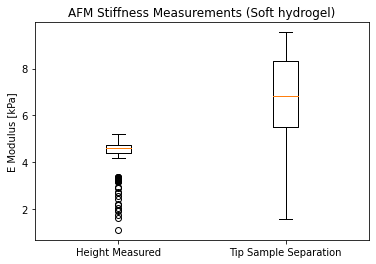

In [39]:
fig, ax = plt.subplots()

ax.boxplot([np.array(E_20220228_MeasHei)*1e-3, np.array(E_20220228_TipSampSep)*1e-3])
plt.ylabel("E Modulus [kPa]")
#ax.set_yticks((np.arange(0, np.array(E_20220223_D1_p1).max()*1e-3, 2.5)))
ax.set_title("AFM Stiffness Measurements (Soft hydrogel)")
ax.set_xticklabels(["Height Measured","Tip Sample Separation"])
fig.savefig("SoftGelsHM_vs_TSP.png", dpi=300)
plt.show()

# 20220308 Soft Hydrogels

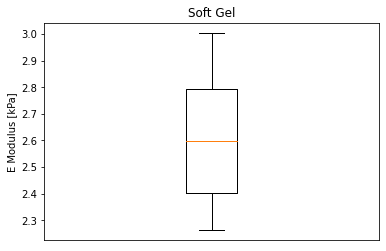

In [40]:
E_1 = [2682.12, 2769.58, 2666.54, 2533.99, 2671.27, 2820.09, 2842.42, 2845.29, 2848.19, 2864.39, 2731.19, 2520.90, 2657.75, 2830.78, 2830.09, 2805.94, 2834.00, 2749.33, 2736.12, 2975.15, 3004.48, 2997.59, 2825.38, 2961.21, 2895.87, 3000.58, 2766.75, 2900.65, 2875.35, 2891.83, 2987.99, 2986.51, 2931.29, 2969.32, 2728.01, 2939.69, 2988.98, 2983.34, 2982.40, 2825.65, 2920.23, 2891.77, 2862.10, 2982.29, 2995.62, 2937.11, 2852.66, 2960.76, 2991.57, 2909.17, 2995.28, 2929.86, 2930.61, 2974.84, 2908.55, 2978.76, 2915.27, 2847.64, 2988.69, 2898.84, 2907.75]
E_2 = [2742.32, 2712.62, 2743.09, 2751.19, 2784.89, 2831.70, 2765.67, 2811.19, 2795.97, 2784.61, 2793.88, 2754.33, 2737.07, 2615.56, 2627.69, 2596.81, 2572.88, 2651.40, 2702.26, 2761.93, 2780.36, 2738.12, 2747.64, 2765.40, 2793.44, 2801.50, 2770.53, 2625.52, 2725.70, 2630.96, 2632.41, 2595.35, 2583.08, 2620.66, 2666.93, 2673.16, 2599.75, 2677.67, 2685.18, 2624.70, 2655.20, 2698.06, 2727.92, 2640.67, 2666.08, 2677.97, 2646.15, 2605.23, 2559.41, 2638.39, 2672.80, 2756.54, 2793.79, 2865.67, 2897.08, 2876.96, 2923.08, 2902.90, 2880.98, 2845.76, 2809.87, 2769.44, 2748.43, 2721.80]
E_3 = [2448.44, 2385.74, 2343.65, 2422.31, 2500.54, 2393.90, 2312.57, 2494.69, 2392.87, 2351.47, 2502.59, 2562.06, 2476.10, 2384.63, 2306.82, 2407.52, 2381.57, 2262.18, 2361.92, 2498.22, 2630.93, 2510.53, 2351.74, 2425.70, 2385.01, 2339.89, 2513.72, 2598.93, 2488.20, 2360.57, 2306.32, 2460.66, 2549.92, 2395.72, 2411.41, 2458.23, 2480.62, 2457.59, 2348.59, 2370.78, 2406.86, 2438.46, 2482.59, 2434.04, 2437.27, 2433.38, 2483.52, 2670.00, 2702.73, 2731.82, 2628.54, 2602.46, 2552.64, 2513.85, 2502.69, 2447.71, 2348.01, 2470.37, 2500.30, 2529.47, 2677.40, 2831.80, 2904.98, 2712.94]
E_4 = [2416.53, 2413.95, 2394.26, 2374.63, 2340.64, 2322.35, 2296.99, 2273.37, 2337.86, 2278.47, 2301.29, 2318.95, 2304.32, 2284.75, 2281.26, 2339.02, 2407.38, 2456.69, 2492.55, 2506.34, 2380.42, 2336.31, 2323.99, 2293.50, 2288.68, 2302.75, 2291.05, 2325.32, 2338.06, 2308.59, 2375.60, 2440.40, 2512.65, 2533.65, 2468.19, 2516.13, 2475.82, 2360.91, 2352.24, 2358.48, 2323.69, 2312.58, 2335.72, 2335.11, 2353.72, 2377.96, 2397.81, 2461.21, 2488.32, 2450.19, 2505.99, 2455.67, 2454.39, 2415.35, 2348.23, 2357.70, 2374.67, 2351.40, 2388.33, 2332.85, 2380.59, 2387.87, 2401.88, 2482.12, 2523.99, 2543.82]
E_20220308 = np.array(E_1+E_2+E_3+E_4)
plt.boxplot(E_20220308*1e-3)
plt.ylabel("E Modulus [kPa]")
plt.title("Soft Gel")
plt.xticks([0],[""])
plt.savefig("SoftGels0803.png", dpi=300)
plt.show()

# 20220309 Nuclei

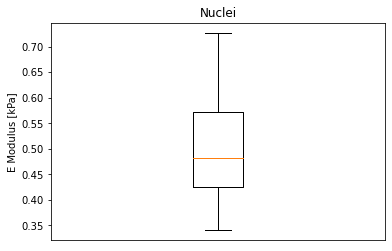

In [41]:
E_1 = [618.011, 500.562, 457.502, 474.077, 462.802, 491.217, 476.544, 475.881, 474.482, 451.317, 447.281, 468.324, 523.439, 566.298, 663.622, 628.754, 535.464, 466.166, 444.824, 433.800, 438.734, 446.013, 446.964, 451.808, 472.043, 475.816, 501.894, 478.656, 483.420, 528.070, 571.970, 579.724, 495.714, 478.563, 497.174, 513.984, 534.060, 534.854, 510.978, 575.648, 618.587, 607.465, 585.863, 556.365, 485.932, 537.009, 584.081, 589.745, 493.496, 474.285, 536.083, 604.935, 630.395, 660.209, 617.975, 677.687, 657.437, 647.763, 616.816, 550.037, 512.176, 507.321, 572.943]
E_2 = [559.732, 516.847, 489.166, 459.647, 441.875, 406.523, 389.652, 370.745, 417.375, 430.385, 447.091, 441.391, 490.208, 530.010, 565.193, 533.427, 505.038, 466.421, 432.077, 402.530, 400.937, 386.221, 380.621, 373.867, 385.923, 389.304, 397.856, 421.545, 448.483, 481.805, 528.367, 523.667, 503.920, 468.448, 412.769, 390.927, 383.474, 369.580, 351.196, 362.085, 385.884, 401.679, 396.159, 392.119, 420.646, 453.416, 491.799, 498.653, 485.980, 442.071, 417.614, 399.332, 359.074, 373.063, 369.528, 357.468, 397.222, 387.872, 350.575, 343.597, 397.528, 416.486, 445.557]
E_3 = [582.956, 665.587, 682.859, 656.166, 726.931, 715.624, 699.533, 695.118, 637.163, 608.015, 697.491, 636.169, 621.554, 655.319, 672.249, 629.274, 693.083, 656.452, 681.983, 648.925, 592.675, 568.431, 537.289, 523.672, 480.387, 502.565, 461.206, 502.413, 576.573, 642.390, 594.588, 639.265, 592.028, 629.740, 615.515, 537.146, 455.704, 442.457, 448.550, 482.377, 450.380, 396.387, 376.055, 360.744, 340.271, 429.624, 495.941, 503.774, 441.068, 464.166, 424.223, 397.706, 408.937, 458.639, 433.892, 470.472, 522.796, 490.483, 435.999, 401.358, 360.106, 350.550, 383.331, 392.959]
E_20220309 = np.array(E_1+E_2+E_3)
plt.boxplot(E_20220309*1e-3)
plt.ylabel("E Modulus [kPa]")
plt.title("Nuclei")
plt.xticks([0],[""])
plt.savefig("Nuclei0309.png", dpi=300)
plt.show()

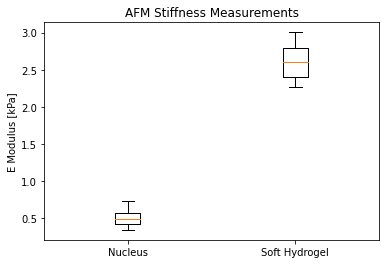

In [42]:
fig, ax = plt.subplots()

ax.boxplot([E_20220309*1e-3,E_20220308*1e-3])
plt.ylabel("E Modulus [kPa]")
#ax.set_yticks((np.arange(0, np.array(E_20220223_D1_p1).max()*1e-3, 2.5)))
ax.set_title("AFM Stiffness Measurements")
ax.set_xticklabels(["Nucleus","Soft Hydrogel"])
fig.savefig("SoftGel_Nucleus_march.png", dpi=300)
plt.show()

# 20220419 GFP Gel

In [43]:
# used in 20220416 Exp and prepared on that day
# measured on 19.04

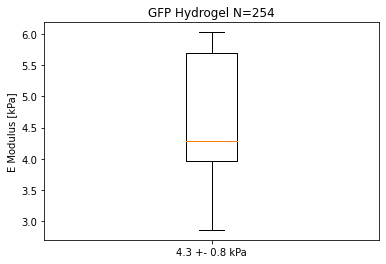

In [57]:
E_1 = [3940.67, 3938.72, 3922.26, 3714.00, 3943.65, 3971.04, 3983.85, 3955.84, 3953.92, 3939.89, 3932.72, 3928.20, 3748.86, 3671.52, 3570.64, 3538.79, 3652.54, 3700.18, 3741.91, 3718.10, 3688.53, 3664.21, 3560.62, 3466.56, 3574.07, 3663.08, 3643.93, 3679.68, 3615.95, 3578.11, 3467.94, 3418.46, 3537.00, 3054.04, 2862.48, 3596.54, 3638.93, 3566.58, 3413.28, 3938.36, 3930.99, 3909.80, 3920.32, 3935.84, 3929.95, 3953.87, 3919.52, 3940.18, 3966.90, 3931.05, 3920.41, 3900.52, 3911.78, 3909.38, 3925.64, 3901.30, 3907.33, 3930.74, 3960.14, 3942.58, 3965.61, 3984.50]
E_2 = [5905.70, 5901.29, 5850.42, 5867.83, 5878.37, 5896.42, 5924.76, 5958.76, 5887.19, 5894.44, 5870.76, 5876.47, 5885.40, 5842.67, 5853.98, 5870.35, 5811.88, 5792.31, 5815.63, 5863.43, 5853.82, 5756.02, 5790.34, 5823.77, 5798.93, 5796.76, 5829.86, 5817.96, 5814.55, 5779.72, 5729.97, 5753.50, 5717.27, 5733.24, 5859.56, 5828.22, 5777.05, 5784.84, 5737.30, 5772.63, 5755.72, 5713.39, 5743.13, 5742.17, 5788.65, 5817.92, 5799.19, 5743.52, 5738.07, 5755.94, 5817.61, 5767.80, 5728.82, 5710.27, 5699.10, 5709.88, 5669.58, 5710.83, 5689.83, 5721.10, 5744.38, 5758.53, 5763.17, 5789.23]
E_3 = [4025.25, 4044.56, 4098.07, 4126.09, 4196.52, 4237.20, 4270.79, 4301.33, 4231.80, 4221.29, 4194.51, 4168.16, 4128.82, 4090.61, 4046.44, 4026.87, 3979.54, 4030.08, 4053.10, 4124.61, 4150.82, 4143.44, 4189.65, 4207.12, 4169.81, 4161.13, 4143.80, 4092.50, 4048.10, 4024.77, 4019.09, 3983.16, 3954.15, 3974.65, 4004.17, 4013.88, 4040.25, 4125.25, 4126.33, 4140.61, 4143.94, 4115.28, 4055.69, 4060.93, 4035.98, 3988.99, 3971.77, 3964.85, 3969.10, 3950.46, 3981.67, 4107.19, 4051.27, 4062.37, 4087.47, 4127.92, 4071.30, 4045.96, 4032.58, 4053.61, 3994.76, 3965.29, 3975.39, 3946.34]
E_4 = [5214.28, 5274.16, 5340.52, 5358.18, 5353.45, 5507.42, 5728.99, 6025.28, 5615.56, 5527.43, 5441.08, 5292.49, 5240.87, 5233.71, 5182.90, 5135.77, 4995.22, 5062.67, 5119.41, 5123.28, 5212.66, 5374.78, 5431.16, 5452.19, 5231.35, 5231.83, 5176.10, 5077.27, 4995.50, 4968.46, 4949.62, 4891.34, 4781.91, 4874.79, 4953.51, 4945.34, 4980.63, 5060.66, 5060.77, 5142.80, 5043.26, 4954.38, 4902.62, 4836.81, 4801.59, 4879.36, 4838.09, 4693.79, 4617.46, 4491.80, 4759.89, 4094.71, 3948.09, 4821.42, 4859.32, 4930.90, 4824.01, 4780.64, 4752.94, 4696.44, 4674.52, 4658.36, 4599.02, 4571.33]
E_20220416 = np.array(E_1+E_2+E_3+E_4)
plt.boxplot(E_20220416*1e-3)
plt.ylabel("E Modulus [kPa]")
plt.title(f"GFP Hydrogel N={len(E_20220416)}")
plt.xticks([1],[f"{np.round(np.median(E_20220416),-2)/1e3} +- {np.round(np.std(E_20220416),-2)/1e3} kPa"])
plt.savefig("GFP_SoftGels0416.png", dpi=300)
plt.show()

In [45]:
# statistical test GFP vs softgels
w, p = mannwhitneyu(E_all_softhydrogel, E_20220416) 
p

NameError: name 'E_all_softhydrogel' is not defined

NameError: name 'E_all_softhydrogel' is not defined

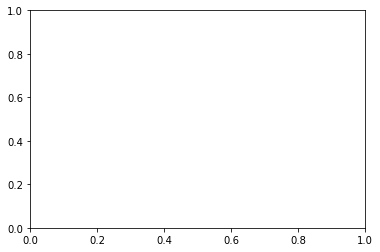

In [47]:
fig, ax = plt.subplots()

ax.boxplot([E_all_softhydrogel*1e-3, E_20220416*1e-3])
plt.ylabel("E Modulus [kPa]")
#ax.set_yticks((np.arange(0, np.array(E_20220223_D1_p1).max()*1e-3, 2.5)))
ax.set_title(f"Significant Difference of the E-Moduli with p={mannwhitneyu(E_all_softhydrogel, E_20220416)[1]}")
ax.set_xticklabels(["mCherry Gel","GFP Gel"])
#fig.savefig("mCherry_GFP_summary.png", dpi=300)
fig.show()

NameError: name 'E_all_softhydrogel' is not defined

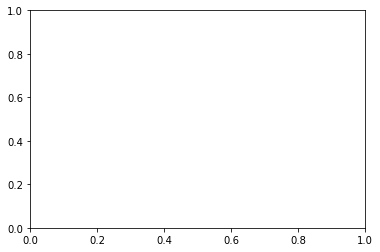

In [48]:
fig, ax = plt.subplots()

ax.violinplot([E_all_softhydrogel*1e-3, E_20220416*1e-3])
plt.ylabel("E Modulus [kPa]")
#ax.set_yticks((np.arange(0, np.array(E_20220223_D1_p1).max()*1e-3, 2.5)))
ax.set_title(f"Significant Difference of the E-Moduli with p={mannwhitneyu(E_all_softhydrogel, E_20220416)[1]}")
ax.set_xticklabels(["","", "mCherry Gel","","","","","GFP Gel"])
#fig.savefig("mCherry_GFP_summary_violin.png", dpi=300)
fig.show()

# 20220520

In [ ]:
# GFP beads 
# Dish1 made tuesday that week (so 3 days old)
# Dish2 made wednesday but underwent cell mirgartion timelapse 2 days at 40°C

In [49]:
# Dish 1
path = "/project/ag-moonraedler/MKreft/AFM/20220520/Dish1/pos1_better/results-2022.05.20-13.42.49.tsv"
path2 = "/project/ag-moonraedler/MKreft/AFM/20220520/Dish1/pos3/results-2022.05.20-16.43.33.tsv"
path3 = "/project/ag-moonraedler/MKreft/AFM/20220520/Dish1/pos4/results-2022.05.20-16.48.44.tsv"

# Dish2
pathd21 = "/project/ag-moonraedler/MKreft/AFM/20220520/Dish2/pos1/results-2022.05.20-16.41.12.tsv"
pathd22 = "/project/ag-moonraedler/MKreft/AFM/20220520/Dish2/pos2/results-2022.05.20-16.38.07.tsv"

In [50]:
data=pd.read_csv(path ,sep='\t')
data2=pd.read_csv(path2 ,sep='\t')
data3=pd.read_csv(path3 ,sep='\t')
datd1 = data.append([data2, data3], ignore_index=True)

datad21 = pd.read_csv(pathd21 ,sep='\t')
datad22 = pd.read_csv(pathd22 ,sep='\t')
datd2 = data.append(datad22, ignore_index=True)

In [51]:
E_D1 = datd1["Young's Modulus [Pa]"].values
E_D2 = datd2["Young's Modulus [Pa]"].values
E_20220520 = datd1.append(datad21, ignore_index=True)["Young's Modulus [Pa]"].values # dish 2 second set is too noisy

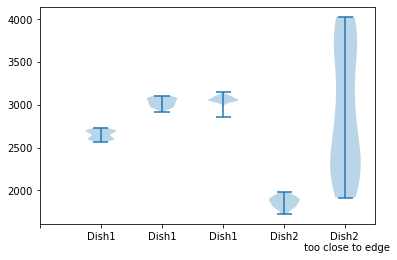

In [52]:
# all measurements next to each other
da_Es = [i["Young's Modulus [Pa]"].values for i in [data, data2, data3, datad21, datad22]]
plt.violinplot(da_Es)
plt.xticks(range(6), ["","Dish1","Dish1","Dish1","Dish2","Dish2 \n too close to edge"])
plt.savefig("AllMeasures_20220520.png", dpi=300)
plt.show()

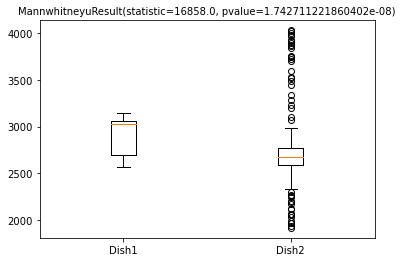

In [53]:
plt.boxplot([E_D1, E_D2])
plt.title(stats.mannwhitneyu(E_D1, E_D2), size=10)
plt.xticks([1,2], ["Dish1","Dish2"])
plt.savefig("D1D2_20220520.png", dpi=300)
plt.show()

In [54]:
(stats.mannwhitneyu(E_D1, E_D2))

MannwhitneyuResult(statistic=16858.0, pvalue=1.742711221860402e-08)

In [55]:
# nach update von E_all das hier nicht mehr ausführen
plt.boxplot([E_20220520, E_all_softhydrogel])
plt.title(stats.mannwhitneyu(E_20220520, E_all_softhydrogel), size=10)
plt.xticks([1,2], ["20220520","all other softs"])
#plt.savefig("vsOldAll_20220520.png", dpi=300)
plt.show()

NameError: name 'E_all_softhydrogel' is not defined

In [56]:
# nach update von E_all das hier nicht mehr ausführen
E_new = np.array(list(E_all_softhydrogel) + list(E_20220520))
plt.boxplot([E_all_softhydrogel, E_new])
plt.title(stats.mannwhitneyu(E_all_softhydrogel, E_new), size=10)
plt.xticks([1,2], ["all softgels old","all softgels new"])
plt.savefig("All_old_vs_new_20220520.png", dpi=300)
plt.show()

NameError: name 'E_all_softhydrogel' is not defined

# Summary of Results

In [58]:
E_all_softhydrogel = list(E_20220228_MeasHei)+list(E_20220308) + E_20220114_HM +  E_20220114_TSS +E_20220121_HM +list(E_20220520)
E_all_nuclei = list(E_cell_20220124_HM)+list(E_20220309)
E_all_softhydrogel = np.array(E_all_softhydrogel)
E_all_nuclei = np.array(E_all_nuclei)
np.save("AFM_nuclei", E_all_nuclei)
np.save("AFM_softgels", E_all_softhydrogel)

E_n, E_n_std = int(np.round(np.mean(E_all_nuclei),-1)), int(np.round(np.std(E_all_nuclei),-1))
E_gel, E_gel_std = int(np.round(np.mean(E_all_softhydrogel),-1)), int(np.round(np.std(E_all_softhydrogel),-1))

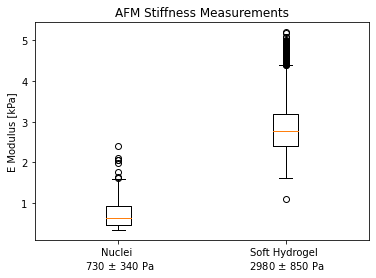

In [59]:
fig, ax = plt.subplots()

ax.boxplot([E_all_nuclei*1e-3, E_all_softhydrogel*1e-3])
plt.ylabel("E Modulus [kPa]")
#ax.set_yticks((np.arange(0, np.array(E_20220223_D1_p1).max()*1e-3, 2.5)))
ax.set_title("AFM Stiffness Measurements")
ax.set_xticklabels([f"Nuclei \n {E_n} $\pm$ {E_n_std} Pa ",f"Soft Hydrogel \n {E_gel} $\pm$ {E_gel_std} Pa "])
fig.savefig("SoftGel_Nucleus_summary.png", dpi=300)
fig.savefig("SoftGel_Nucleus_summary.pdf", dpi=300)
plt.show()

In [60]:
print(f'E_Gel = {np.median(E_all_softhydrogel)} +- {E_all_softhydrogel.std()}')
print(f'E_Nucl = {np.median(E_all_nuclei)} +- {E_all_nuclei.std()}')

print(np.median(E_all_nuclei))



E_Gel = 2777.26 +- 849.100891394105
E_Nucl = 629.014 +- 343.4735812206481
629.014


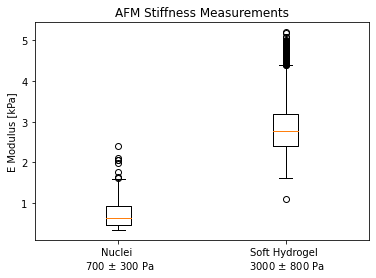

In [61]:
# stronger rounding
E_n, E_n_std = int(np.round(np.mean(E_all_nuclei),-2)), int(np.round(np.std(E_all_nuclei),-2))
E_gel, E_gel_std = int(np.round(np.mean(E_all_softhydrogel),-2)), int(np.round(np.std(E_all_softhydrogel),-2))

fig, ax = plt.subplots()

ax.boxplot([E_all_nuclei*1e-3, E_all_softhydrogel*1e-3])
plt.ylabel("E Modulus [kPa]")
#ax.set_yticks((np.arange(0, np.array(E_20220223_D1_p1).max()*1e-3, 2.5)))
ax.set_title("AFM Stiffness Measurements")
ax.set_xticklabels([f"Nuclei \n {E_n} $\pm$ {E_n_std} Pa ",f"Soft Hydrogel \n {E_gel} $\pm$ {E_gel_std} Pa "])
fig.savefig("SoftGel_Nucleus_summary_round.png", dpi=300)
fig.savefig("SoftGel_Nucleus_summary_round.pdf", dpi=300)
plt.show()

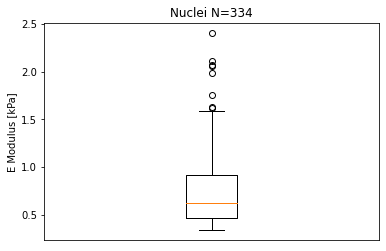

In [62]:
plt.boxplot(E_all_nuclei*1e-3)
plt.ylabel("E Modulus [kPa]")
plt.title("Nuclei N="+str(len(E_all_nuclei)))
plt.xticks([0],[""])
plt.savefig("NucleiSum.png", dpi=300)
plt.show()

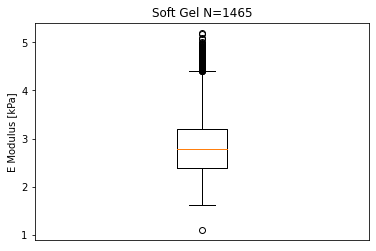

In [63]:
plt.boxplot(E_all_softhydrogel*1e-3)
plt.ylabel("E Modulus [kPa]")
plt.title("Soft Gel N="+str(len(E_all_softhydrogel)))
plt.xticks([0],[""])
plt.savefig("SoftGelsSumm.png", dpi=300)
plt.show()

In [ ]:
1+1